# ANLP 2021 - Assignment 2

Yerkezhan Abdullayeva

<div class="alert alert-block alert-danger">Due: Monday, December 13, 2021, 23:59pm</div>

<div class="alert alert-block alert-info">
    
In this assignment, you will implement a feedforward neural network and train it with backpropagation to classify intent from the provided dataset (<https://github.com/Dark-Sied/Intent_Classification>). For the purpose of understanding the learning process, the whole dataset is used as both training and test data. (What does that mean for your results?)<br><br>

You should implement all parts of this exercise using only python + standard libraries + NumPy. (That is, no specialised machine learning libraries are allowed.) Here is a list of NumPy functions that may or may not be useful for this task: <br>
`np.array(), np.eye(), np.reshape(), np.ones(), np.zeros(), np.dot(), np.concatenate(), np.maximum(), np.argmax(), np.sum(), np.uniform()`. <br><br>

A more comprehensive introduction to NumPy can be found here: <https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf> .

</div>

In [1]:
# For your convenience, a function for reading in the dataset:
import csv
import numpy.typing as npt
from typing import Tuple, List, Set

def load_dataset(filename: str) -> Tuple[List[str], List[str], Set[str]]:
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent

In [2]:
sentences, intent, unique_intent = load_dataset("dataset.csv")

In [155]:
sentences
#as we can see there are also symbols included and they should be removed before the one-hot encoding process'
#Aslo words need to be tokenized'

['Need help pleese',
 'Need help',
 'I need some info',
 'Will you help me?',
 'What else can you do?',
 'What do you do?',
 'What can you help me with?',
 'What can you do?',
 'What are you good at?',
 'Need help plz',
 'How can you help me',
 'Can you help me?',
 'How can you assist?',
 'How can you help me?',
 'How do you help?',
 'How to help you?',
 'How will you assist me?',
 'i need help',
 'Can you tell some info',
 'Help me please',
 'Is this a bot?',
 'Is there a bot chatting to me?',
 'Is it automated message?',
 'Computer based pely',
 'Bot or human?',
 'Bot is chatting with me?',
 'Are you system generated message?',
 'Are you robot?',
 'Are you machine?',
 'Are you just computer?',
 'Are you a robot?',
 'Are you a person?',
 'Are you a machine?',
 'Are you a chatbot?',
 'Are you a bot?',
 'Are these automated messages?',
 'Am I talking to a bot?',
 'You are a boy are girl?',
 'You are a bot or human?',
 'This is a machine?',
 'This is a chatbot?',
 'System generated reply

In [156]:
sentences_array=np.array(sentences)
sentences_array.shape
#for every sentence there is an intent:for 1113 sentences there are 1113 intents

(1113,)

In [154]:
intent_array=np.array(intent)
intent_array.shape

(1113,)

In [157]:
unique_intent
#these are our output classes in a unique form.

{'commonQ.assist',
 'commonQ.bot',
 'commonQ.how',
 'commonQ.just_details',
 'commonQ.name',
 'commonQ.not_giving',
 'commonQ.query',
 'commonQ.wait',
 'contact.contact',
 'faq.aadhaar_missing',
 'faq.address_proof',
 'faq.application_process',
 'faq.apply_register',
 'faq.approval_time',
 'faq.bad_service',
 'faq.banking_option_missing',
 'faq.biz_category_missing',
 'faq.biz_new',
 'faq.biz_simpler',
 'faq.borrow_limit',
 'faq.borrow_use'}

## Problem 1: Bag-of-Words Representation [15pts]

<div class="alert alert-block alert-info">

The first thing you're being asked to do is to convert the text into a bag-of-words representation matrix where the dimension of the matrix is $V$ x $M$ ($M$: number of examples, $V$: vocabulary size) and the label to a matrix of dimension $K$ x $M$ where $K$ is number of classes.   

</div>

In [3]:
import numpy as np
#𝑉 V   x 𝑀 M  (𝑀 M : number of examples,V : vocabulary size)
#and the label to a matrix of dimension 𝐾 K  x 𝑀 M  where 𝐾 K  is number of classes.

#firstly,we need to create a function,which returns bag-of-words representation matrix.
def bag_of_words_matrix():
    bag_of_words_empty = np.zeros((vocabulary_size,number_of_examples))
    for element in range(vocabulary_size):
        vocable  = list(real_vocabulary)[element]
        for thing in range(number_of_examples):
            if( vocable in sentences[thing]):
                bag_of_words_empty[element][thing]=1
            else:
                bag_of_words_empty[element][thing]=0
    return bag_of_words_empty
#Bag-of-word is a representation of text that describes the occurrence of words within a document. 
#Thus,bag of word model doesn't respect the semantics of the word.

In [4]:
def labels_matrix():
    labels_onehot = np.zeros((number_of_classes,number_of_examples))
    for element in range(number_of_classes):
        cls = list(unique_intent)[element]
        for thing in range(number_of_examples):
            if(cls == intent[thing]):       
                labels_onehot[element][thing]=1
            else:
                labels_onehot[element][thing]=0
    return labels_onehot
#Output : labeled is a (k x m) matrix where k is number of intent (total classes) and m is number of examples.

In [5]:
import re
#as as I remember we are allowed to used regex.
words_compiled = re.compile(r"[\w']+|[.,!?;]")
words_colllected= [] 
for vocable in sentences:
    words_colllected+=words_compiled.findall(vocable)
real_vocabulary= set([vocable.lower() for vocable  in words_colllected if vocable  not in [".",",","!","?",";","[","]"]])
#here we are making all our words lower case words and making sure that no symbol will be included,in this case
#our representation will be full of irrelevant tokens.

sentences_indx={}
for sentences_indx1 in sentences:
    sentences_indx[sentences_indx1]=sentences.index(sentences_indx1)

voc= {}
for vocable in list(real_vocabulary):
    voc[vocable]= list(real_vocabulary).index(vocable)

int_ent = {intent:list(unique_intent).index(intent) for intent in list(unique_intent)}

number_of_examples= len(sentences)#which we get from the data provided.
vocabulary_size = len(real_vocabulary) 
number_of_classes = len(unique_intent)#our output classes.

bag_of_words = bag_of_words_matrix()#this will serve as x axis.
one_hot = labels_matrix()#this will serve as y axis.

## Problem 2: Activation Functions [10 pts]

<div class="alert alert-block alert-info">
    
For the classification task, the softmax activation function for the output layer with K classes is given by: 
$softmax(z_i) = \frac{e^{z_i}}{{\sum_{j=1}^{K}e^{z_j}}}$ <br>
The activation function of the hidden neurons is a non-linear function. We have seen tanh being used in class, but more common these days are for example ReLU or sigmoid, given by: <br>
$ReLU(z)=max(0,z)$ <br>
$sigmoid(z)=\frac{1}{1+e^{-z}}$ <br>

Implement the softmax, ReLU, and sigmoid activation function in such a way that it accepts NumPy array and matrices. Plot the ReLU and sigmoid functions, as well as their derivatives. Observe the plot and discuss briefly what the advantages and disadvantages of the ReLU and sigmoid activation function might be. 

</div>

In [6]:
# Implement the functions below here
import numpy as np
def softmax(vector):
    exponential=np.exp(vector)
    soft_max=exponential/np.sum(exponential)
    return soft_max
#Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities,
#where the probabilities of each value are proportional to the relative scale of each value in the vector.

def sigmoid(vector):
    exp=np.exp(-vector)
    sigmoid_f=1/(1+exp)
    return sigmoid_f
#Sigmoid Function acts as an activation function in machine learning which is used to add non-linearity .Formula is: F(x) = 1/(1 + e^(-x))

def relu(vector):
    relu_f=np.maximum(0,vector)
    return relu_f
#Rectified Linear Activation Function

def sigmoid_prime(vector1):
    sigmoid_f2= sigmoid(vector1)
    derivative_sigmoid=sigmoid_f2*(1-sigmoid_f2)
    return derivative_sigmoid
#derivative of Sigmoid fucntion.

def relu_prime(vector):
    a = vector >= 0
    return a.astype(int)
#derivative of Relu funtion.
# Function compares each value in array or matrix with 0 and returns 1 if a value is greater than 0 else it returns 0.
# Do not run any other code in this cell

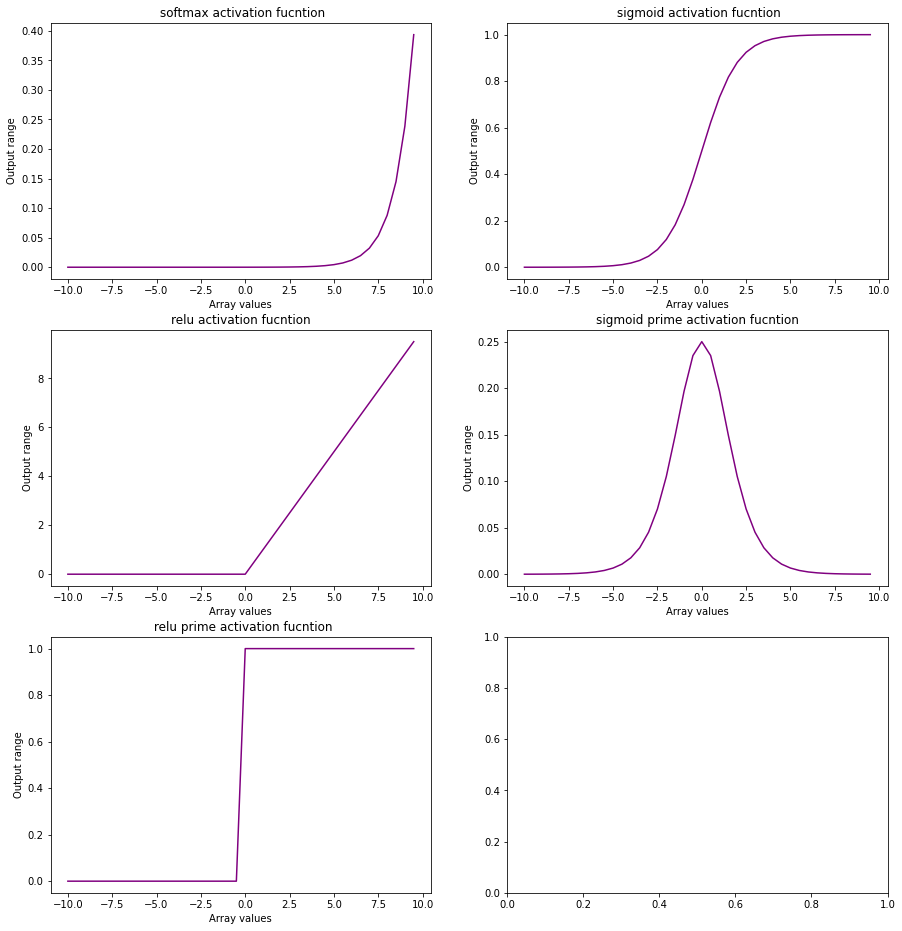

In [7]:
# Plot your implemented functions in this cell
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
fig, axis = plt.subplots(3,2, figsize = (15,16))
axis = axis.reshape(-1)
# Plot your implemented functions in this cell
array_example=np.arange(-10,10,0.5)
#For example,we take an array from -10 to +10 with differnece in 0.5.We could take random numbers,but it would be
#harder for us to track the change.
Activation_fucntions=[softmax , sigmoid , relu , sigmoid_prime , relu_prime]
Names_of_activation = [' softmax ',' sigmoid ', 'relu ' ,'sigmoid prime ',' relu prime ']
#we create the fucntion,so we don#t have to manually to plot the expamle fucntions.
#Otherwise,we could write function(array_example) for 5 times,but it is less efficient timewise.
for index,a_function in enumerate(Activation_fucntions):
    axis[index].plot(array_example, a_function(array_example),color='purple')
    axis[index].set_title(Names_of_activation[index]+'activation fucntion')
    axis[index].set_xlabel("Array values")
    axis[index].set_ylabel("Output range")
#I decided to plot also softmax just for the comparison out of curiousiy.

#  RELU Function.
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 

Advantages:
1.Avoids vanishing gradients problem.
2.The output neuron is not in the range between 1 and 0.This is better for backpropagation.
3.Cheap computation.
4.Tend to show better convergence performance than sigmoid. 

Disadvantages:
1.We can lose some important data while transforming all negative values into zeros.
2.Blowing-up the activation problem: mapping of output from 0 to infifity and  getting very high values.

# Sigmoid Function.
The sigmoid activation function, also called the logistic function, is traditionally a very popular activation function for neural networks. The input to the function is transformed into a value between 0.0 and 1.0.

Advantages:
1.No blowing up activation as if in Relu activation function.
2.Sigmoid Function is non-linear,which can be used for activation of hidden layers.
3.Monotonic and continious.
4.Gives a clear prediction(classification) with 1 and  0.

Disadvantages:
1.Vanishing Gradient problem:  weights dont   get updated much leading to very slow convergence.
2.Computationally expensive function.
3.Always gives a positive values,which means that it is not a zero-centric function.

## Problem 3: Feedforward Neural Network [35 pts]

<div class="alert alert-block alert-info">
    
Now that you have created the input matrix, we can implement our neural network and perform a forward propagation to classify intent. To perform the forward propagation, you should compute $z^{l}$ and pass it through the activation function for each layer, given by: <br><br>
$z^{l} = W^{l}a^{l-1} + b^{l}$ <br>
$a^{l} = g(z^{l})$ <br>
where $W^{l}$ is a weight matrix between layer $l$ and $l+1$, $z^{l}$ is value of the hidden layer at layer $l$ before activation, $a^{l}$ is value of the hidden layer at layer $l$ after activation, and $b^{l}$ is bias term for layer $l$.

You should implement the feedforward computation that computes $\hat{y_{i}}$ for every example $i$. The neural network has 3 layers - an input layer, a hidden layer and an output layer, where the hidden layer has 150 neurons. Don't forget to include the bias term. Use ReLU as the activation function for the hidden layer and softmax for the output layer. For parameters initialization, use random values from a uniform distribution in the range (-1,1). Provide a seed value to the random number generator, to make the results reproducible. The purpose of using this kind of initialisation is to break symmetry and ensure that different neurons can learn different non-linear functions. (Hint: use vectorization methods instead of a for loop for speedup.) <br><br>

Use this neural network to predict the intent and calculate the accuracy of the classifier. (Should you be expecting high numbers yet?)

</div>

In [8]:
#A Feed Forward Neural Network is an artificial neural network in which 
#the connections between nodes does not form a cycle.
class Feedforward_Neural_Network:
    
    def __init__(self, input_size,num_classes, hidden_size=150): 
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes= num_classes
        # Putting random values from a uniform distribution in the range (-1,1).
        self.hidden_layer_weight = np.random.uniform(-1,1,(self.hidden_size , self.input_size ))
        self.output_of_weight= np.random.uniform(-1,1,(self.num_classes, self.hidden_size ))
        self.hidden_layer_bias= np.random.randn(self.hidden_size )
        #bias term.
        self.bias_output = np.random.randn(self.num_classes)
        np.random.seed()
#A hidden layer in an artificial neural network is a layer in between input layers and output layers, 
#where artificial neurons take in a set of weighted inputs and produce an output through an activation function


#Bias-'extra'neuron  allows you to shift the activation function by adding a constant (i.e. the given bias) to the input.


#Weight is the parameter within a neural network that transforms input data within the network's hidden layers.


    def feedforward(self, text_vector):
        h_layer = np.dot(self.hidden_layer_weight , text_vector ) + self.hidden_layer_bias
        hidden_layer = relu(h_layer )
        out  = np.dot(self.output_of_weight, hidden_layer ) + self.bias_output 
        output = softmax(out)
        return output

In [9]:
# Initialize a model, compute its predictions on the intent data
feed_frd_model = Feedforward_Neural_Network(input_size=len(bag_of_words),num_classes=len(one_hot))
feed_frd_model.feedforward(bag_of_words[:,0])
#just putting our data into the fucntion of feedforward model.

array([2.57794815e-11, 1.98470578e-07, 1.02747277e-12, 2.01277951e-07,
       2.22541551e-01, 2.69962910e-08, 9.53650683e-08, 2.64312255e-03,
       7.72099704e-01, 4.50749253e-11, 6.49084467e-07, 3.10404694e-07,
       2.00773065e-11, 2.14958134e-05, 3.49026085e-08, 1.29988998e-12,
       5.22842556e-04, 2.52892041e-11, 1.53088976e-10, 2.08037318e-03,
       8.93941282e-05])

In [12]:
def accuracy1(data, intents):
    truely_predicted = 0 
    for i in range(data.shape[1]):
        prediction1 =feed_frd_model.feedforward(data[:,i])
        true_ones = intents[:,i]
        position_intent = np.argmax(prediction1) 
        if true_ones[position_intent] == 1:
            truely_predicted += 1
    accuracy = truely_predicted / data.shape[1]*100 
    return accuracy

In [13]:
accuracy1(bag_of_words,one_hot)
#Accuracy should not be very high as we have assigned random inputs.
#We did not train our model,so there is no point in assuming that our model can predict with random initialization.

4.492362982929021